In [13]:
import re
import numpy as np
from tempfile import TemporaryDirectory
from pathlib import Path
import os

gmx msd \
-mol \
-f traj.xtc \
-s box.gro 

In [ ]:
with TemporaryDirectory as temp_dir:
    temp_dir =Path(temp_dir)
    command=f"""
gmx select \
-s system.tpr \
-select BUT
-on but.ndx


gmx msd \
-s box.tpr \
-mol \
-f traj.xtc \

"""

In [5]:
def read_xvg(xvg_path):
    with open('1.xvg') as file:
        data = file.readlines()
    D_pattern = r'D\[\s*(?P<name>\w+)\s*\] = (?P<value>[\d\.]+)\s*\(\+\/\- (?P<error>.+)\s*\)\s*\(\s*(?P<unit>.+)\s*\)'
    MSD = []
    D_flag = False
    for line in data:
        D_line = re.search(
            string=line,
            pattern=D_pattern,
        )
        MSD_line = re.search(
            string=line,
            pattern=r'\s*(?P<time>\d+)\s*(?P<MSD>[\d\.]+).*',
        )
        if D_line:
            name, D, dD, value = D_line.groups()
            scale, unit = [part.strip() for part in value.split(' ')]

            D = float(D)
            dD = float(dD)
            scale = float(scale)
            D_flag = True

        if MSD_line and D_flag:
            time, msd = MSD_line.groups()
            MSD.append((int(time), float(msd)))
    MSD = np.array(MSD)
    return (name, D, dD, unit), MSD

In [7]:
(name, D, dD, unit), MSD= read_xvg('msd.xvg')

In [8]:
import matplotlib.pyplot as plt

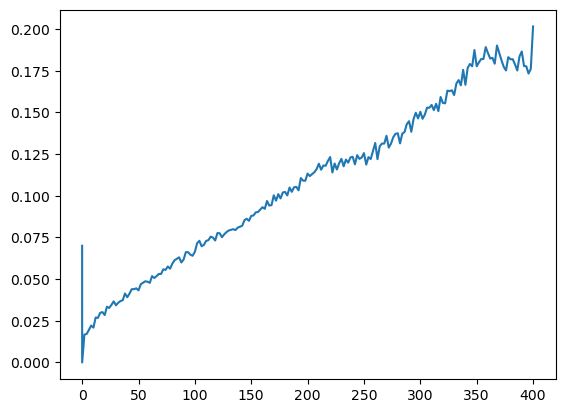

In [11]:
plt.plot(MSD[:,0],MSD[:,1])